第一章&第二章

Part 1:

1. 视觉系统都有哪些构成要素? 以机械臂视觉控制系统为例，说明视觉系统的构成要素。 
2. 尝试从模仿人类视觉处理流程的角度，阐述本对课程内容组织的理解。进一步在网上搜索，找到自己认为学习过程中最值得参考的1-2本书(不要太厚) 
3. 什么是光通量和辐照度？说明几个常见光源的光通量，以及几个常见照明环境的辐照度。 
4. 结合颜色空间示意图，简述HSI颜色空间中各通道的物理意义，并结合图像实例说明。 
5. 说明彩色图像传感器及γ校正的基本原理。

1. 视觉系统主要有四个要素组成：
    照明设备
    成像设备
    处理设备
    算法软件
机械臂的视觉控制：
    照明设备：在工作环境下一般以可见光为主，特殊环境可以使用UV IR波段进行任务，配合不同的场景和成像设备
    成像设备：CMOS/CCD成像镜头，把光信号转化成电信号，通过流行的比如MIPI接口与处理器交流。不同的成像镜头可以带来不同的resolution和frame rate，具体选择看应用场景
    处理设备：一般是PC，embedded system，FPGA等都可以。成型的设备应该包括IO接口，计算单元，存储单元等。在移动设备中流行的有比如Raspberry Pi系列和Nvidia的Jetson（for autonomous driving）系列等等。
    算法软件：常用的编程语言C，C++，Python等。C++和C有较快的速度，一般作为底层语言。python易上手，很多实用的库，能极大减少代码工作量。

2. 人类的视觉处理简化来看也可以分成：
    光学过程：外界的光线经过物体表面反射进入肉眼。通过晶状体实现对焦成像到视网膜上。（机器的相机镜头成像过程模仿这一步）
    化学过程：视网膜细胞接受光线刺激产生化学信号。（相机是转化光信息成电信号，再把电信号转化成数字信号）
    神经过程：化学信号激发神经元，通过神经元层层激发，传递到大脑。（机器通过数字信号传递信息，处理器通过模拟的神经网络去认知收到的图像
整个过程中，人类的接受信息可以是二维，三维甚至四维（物体随时间变化而变化）的。大脑的思考过程也是神经细胞层层激活的过程。
机器通过传导数字信号进入训练过的神经网络去模拟大脑的思考过程，整个过程涉及生物学，物理学，数学等等，是一门综合学科。

推荐的书：
1.Computer Vision : Algorithms and ApplicationsBy By Richard Szeliski 
2.Deep Learning By Ian Goodfellow, Yoshua Bengio, Aaron Courville

3. 光通量：是一种表示光源亮度的指标。单位是流明lumen。广义上来说是单位时间由光源发出或被照物体吸收的总光能。对于人眼来说，对不同频谱的光源人眼的感知能力是不一样的。人眼对于彩色的感知能力K = 683.002 lm/W。K值使光通量的单位与辐射功率的单位得到统一。烛光的光通量是12.56Lm，LED灯的发光效率大概在110lm/W。

   辐照度：指投射到一平方米表面上的辐射通量密度。单位是Lux。辐照度显示了实际生活中人眼能感知到的光通过某一个表面的强度。阴天室内大概5到50Lux，阴天室外有大概50到500Lux。

4. RGB和CMY非常适合硬件实现。通过组合三个基色可以实现对不同颜色的生成。但是在对人的描述过程中，直观上很难直接说各个基色占了多少。所以HSI模型解决的对人的描述问题。HSI模型描述了颜色的色调（hue），饱和度（saturation），和亮度（intensity）。
   色调跟波长有关，表示了人对不同颜色的感知。
   饱和度表示颜色的纯度，有无白光的稀释，加入了白光，饱和度会下降。反之，没有掺杂白光，色彩越鲜艳。
   亮度表示了颜色的明亮程度，对应成像的亮度和图像灰度
   
由课件中颜色模型的案例可以看出
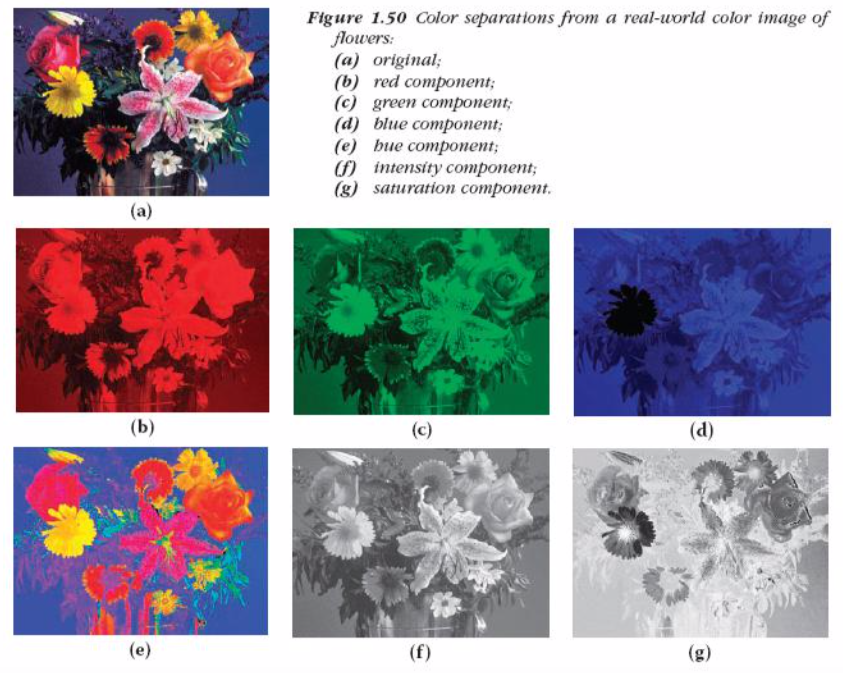
色调显示了各种颜色，具体表述的是在色相环的角度。饱和度越大，所显示的越鲜艳，也可以理解为RGB对比的强烈程度。亮度表示的最大值与最小值的平均值。

5. 色彩图像传感器基本原理：光线通过镜头对焦成像在感光器件（CCD，CMOS）。对于灰度图像，光信号随后被转换成电信号。电信号通过ADC把模拟信号转换变成数字信号，数字信号被存储到存储设备。彩色图像的图像信息由光强，空间位置和波长组成。通过放置彩色滤色片阵列在感光区像素点上方，去收集颜色信息。
   γ校正：源自于亮度上的线性变化在人眼看来是非均匀的。通常情况下人眼对暗部的变化更加敏感，而对亮部变化其实不是很敏感。显示器的gamma值越高，图像越偏暗。SRGB标准中，默认显示设备的gamma值为2.2。在图像的采集和显示的时候要分别进行校正来让图片符合人眼的观测特征。

Part 2：
1. 在计算机上安装OpenCV 3.0以上版本，为后续作业准备。开发语言可采用C++或Python。 
2. 创建第一个视觉程序“Hello，world！”，显示Lena图片。具体效果参看课程PPT。 
3. 对Lena图像，分解得到RGB分量及HSV分量，显示各分量，并对结果进行比较说明。 

In [1]:
#Hello world
from matplotlib import pyplot as plt
import cv2
img = cv2.imread('./picture/lena.jpg')
#img2 = img[:,:,::-1]
#显示图片在当前页面
#plt.imshow(img2)
#plt.axis('off')
#plt.title('hello world')
#plt.show()
cv2.imshow('hello world!', img)
cv2.waitKey()
cv2.destroyAllWindows()

除了个问题，最后一句cv2.destroyAllWindows()似乎不管用。在jupyter notebook上按键退出进程，但图像窗口会无响应！cv2.waitKey()和cv2.destroyAllWindows()工作有点问题。所以加了一组plt显示的方法。尝试了在pycharm上运行，按任何键都可以退出，没有任何问题


似乎没有找到合适的方法去解决这个问题。


In [1]:
import cv2 
from matplotlib import pyplot as plt
image= cv2.imread('./picture/lena.jpg',1)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

cv2.imshow('source image',image)
cv2.imshow('gray',gray)

hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

cv2.imshow('Hue',hsv[:,:,0])
cv2.imshow('Saturation',hsv[:,:,1])
cv2.imshow('Value',hsv[:,:,2])

cv2.imshow('Blue',image[:,:,0])
cv2.imshow('Green',image[:,:,1])
cv2.imshow('Red',image[:,:,2])


b = image.copy()
# set green and red channels to 0
b[:, :, 1] = 0
b[:, :, 2] = 0
g = image.copy()
# set blue and red channels to 0
g[:, :, 0] = 0
g[:, :, 2] = 0
r = image.copy()
# set blue and green channels to 0
r[:, :, 0] = 0
r[:, :, 1] = 0
# RGB - Blue
cv2.imshow('B-RGB', b)
# RGB - Green
cv2.imshow('G-RGB', g)
# RGB - Red
cv2.imshow('R-RGB', r)



cv2.waitKey()
cv2.destroyAllWindows()


从结果来看，RGB通道分别显示了像素点在RGB通道上的分量。因为是单通道，显示的都是灰度图。显示三通道就可以分别得到红，绿，蓝的图。
可以看出来：
    I：表示了RGB的均值，皮肤附近明显比较大，头发部位偏小，但也没到很小。
    S：看上去帽子中部比较低饱和度，头发眉毛比较高
    H：整个皮肤面部比较低，偏红，假发处很高，偏紫。符合色相环跟图片的对应。